## Práctica 2 - Fundamentos de Aprendizaje Automático
### Pareja 3 Grupo 1462
- David Teófilo Garitagoitia Romero
- Daniel Cerrato Sánchez

In [1]:
from Plantillas import Datos, EstrategiaParticionado, kMeans
from Plantillas.Clasificador import ClasificadorKNN,  ClasificadorKNN_SK, normalizarDatos, calcularMediasDesv
from Plantillas.kMeans import getConfusionMatrix, checkClusters

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

In [2]:
dataPath = './ConjuntoDatos/'

# Carga de datasets
diabetes = Datos.Datos(dataPath + "pima-indians-diabetes.csv")
wdbc = Datos.Datos(dataPath + 'wdbc.csv')

# Carga de estrategias de particionado
estrategiaVS = EstrategiaParticionado.ValidacionSimple(20, 0.3)

# Valores de k para pruebas
Ks_knn = [1, 3, 5, 11, 21]
Ks_kmeans = [1, 2, 4, 5]

### k-NN Propio

In [11]:
results = {
    'diab_norm': [],
    'diab_no_norm': [],
    'wdbc_norm': [],
    'wdbc_no_norm': []}

for k in Ks_knn:
    print('k = ' + str(k))
    knn_norm = ClasificadorKNN(k)
    knn_no_norm = ClasificadorKNN(k, normalize=False)

    print('\tCalculando diabetes normalizado...')
    diab_norm_errorVS = knn_norm.validacion(estrategiaVS, diabetes, knn_norm)
    
    print('\tCalculando diabetes no normalizado...')
    diab_noNorm_errorVS = knn_no_norm.validacion(estrategiaVS, diabetes, knn_no_norm)
    
    print('\tCalculando wdbc normalizado...')
    wdbc_norm_errorVS = knn_norm.validacion(estrategiaVS, wdbc, knn_norm)
    
    print('\tCalculando wdbc no normalizado...')
    wdbc_noNorm_errorVS = knn_no_norm.validacion(estrategiaVS, wdbc, knn_no_norm)

    results['diab_norm'].append(np.mean(diab_norm_errorVS))
    results['diab_no_norm'].append(np.mean(diab_noNorm_errorVS))
    results['wdbc_norm'].append(np.mean(wdbc_norm_errorVS))
    results['wdbc_no_norm'].append(np.mean(wdbc_noNorm_errorVS))
    
print('Cálculos finalizados')

k = 1
	Calculando diabetes normalizado...
	Calculando diabetes no normalizado...
	Calculando wdbc normalizado...
	Calculando wdbc no normalizado...
k = 3
	Calculando diabetes normalizado...
	Calculando diabetes no normalizado...
	Calculando wdbc normalizado...
	Calculando wdbc no normalizado...
k = 5
	Calculando diabetes normalizado...
	Calculando diabetes no normalizado...
	Calculando wdbc normalizado...
	Calculando wdbc no normalizado...
k = 11
	Calculando diabetes normalizado...
	Calculando diabetes no normalizado...
	Calculando wdbc normalizado...
	Calculando wdbc no normalizado...
k = 21
	Calculando diabetes normalizado...
	Calculando diabetes no normalizado...
	Calculando wdbc normalizado...
	Calculando wdbc no normalizado...
Cálculos finalizados


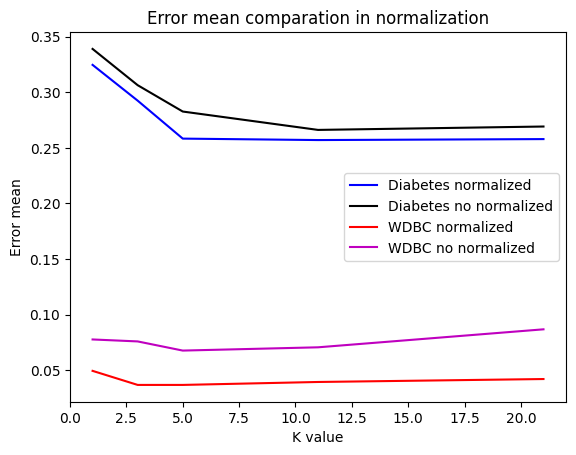

In [12]:
plt.plot(Ks_knn, results['diab_norm'], 'b', label="Diabetes normalized")
plt.plot(Ks_knn, results['diab_no_norm'], 'k', label="Diabetes no normalized")
plt.plot(Ks_knn, results['wdbc_norm'], 'r', label="WDBC normalized")
plt.plot(Ks_knn, results['wdbc_no_norm'], 'm', label="WDBC no normalized")

plt.xlabel("K value")
plt.ylabel("Error mean")
plt.title("Error mean comparation in normalization")
plt.legend()
plt.show()

Como se puede observar, en ambos casos la normalización de los datos genera una mejora de eficacia. Esto sucede porque, al normalizar, todos los atributos aportan valores dentro del mismo rango a la distancia calculada. 

Si no se hace este paso previo, puede pasar que existan rangos y valores muy distintos, haciendo que sea posible que algún atributo parezca más importante de lo que es.

Discutiendo ahora el impacto del número de vecinos escogido, podemos ver como las cuatro funciones encuentran un mínimo de error: descienden desde $k=1$, encuentran el mínimo en algún 'k' intermedio y vuelve a subir hasta $k=21$ (es el último que hemos probado)

Aunque en funciones como las de WDBC no se note tanto el mínimo, podemos ver que estaría entre 5 y 11. En las funciones de DIABETES se nota algo más que el valor de 11 es el que mejor eficacia tiene.

Pero esto son detalles que pueden variar ligeramente dependiendo de la ejecución de los cálculos. Lo relevante está en que no debemos escoger valores demasiado pequeños como 1 o 3, ni tampoco demasiado grandes, ya que todo dependerá de la cantidad de puntos que tengamos para comparar y de su concentración. Y por supuesto, tampoco coger valores pares, puesto que puede pasar que haya empates y el algoritmo no se decida.

### K-Means con iris.csv

Matriz de confusion de 'iris.csv' para k = 3



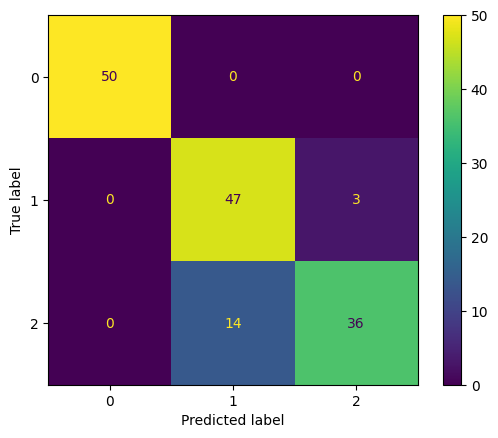

In [5]:
print("Matriz de confusion de 'iris.csv' para k = 3\n")
iris = Datos.Datos(dataPath + 'iris.csv')
k_means = kMeans.kMeans(3)
predictions = k_means.clasifica(iris.datos)
getConfusionMatrix(iris.datos[:,-1], predictions)

Como se puede observar, con $k=3$ se puede asignar a cada cluster un tipo de flor, puesto que hay una gran mayoría de flores del tipo que el cluster indica en cada cluster.

También se puede ver que las flores de tipo 0 (iris-setosa) son más fáciles de identificar que las otras dos. Esto lo conocemos gracias a que las predicciones sobre ese tipo de flor ha conseguido identificar correctamente las 50 exitentes en el dataset. Las otras dos tienen predicciones incorrectas de más como es el caso de iris-versicolor, ya que tiene 48 correctas pero 14 de iris-virginica, en total suman más de las 50 reales. Pasa al contrario con iris-viginica, que tiene 36 correctas y 2 incorrectas que pertencen a iris-versicolor, en total suman 38 de 50 reales.

Matriz de confusion de 'iris.csv' para k = 1



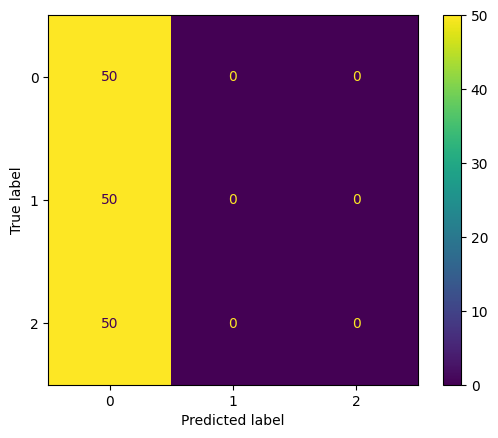




Matriz de confusion de 'iris.csv' para k = 2



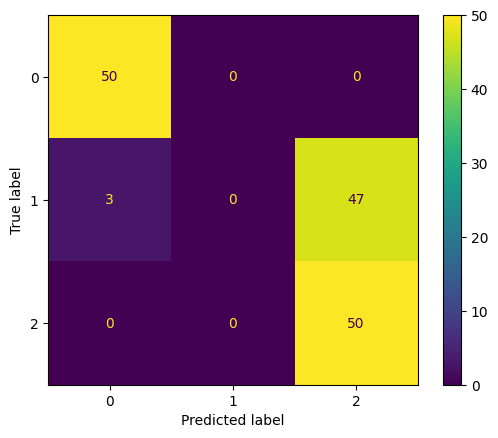




Matriz de confusion de 'iris.csv' para k = 4



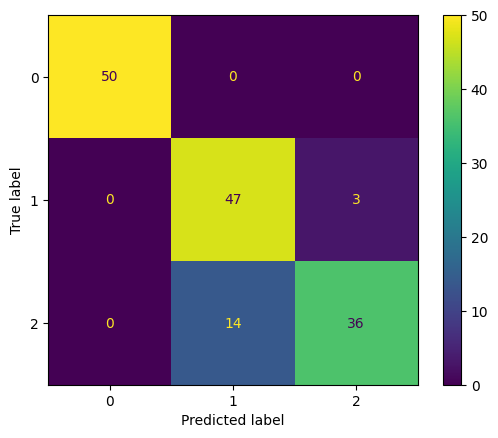




Matriz de confusion de 'iris.csv' para k = 5



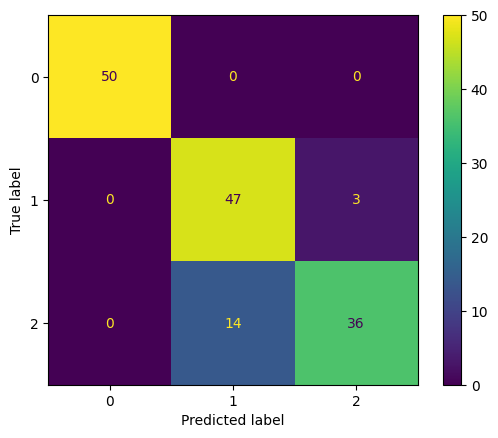

In [6]:
for k in Ks_kmeans:
    print("Matriz de confusion de 'iris.csv' para k = %d\n" % k)
    k_means = kMeans.kMeans(k)
    predictions = k_means.clasifica(iris.datos)
    getConfusionMatrix(iris.datos[:,-1], predictions)
    print("\n\n")

Después de varias ejecuciones de la prueba anterior para varios valores de 'k', podemos ver como $k=1$ es inútil, pues no consigue distinguir las flores en absoluto. $k=2$ es algo mejor, puesto que sigue identificando prácticamente bien las iris-setosas (con algún caso de más), pero las otras dos flores las mete en el mismo grupo, pues son más parecidas. $k=4$ ya sí que consigue distinguirlas mejor y sus resultados son muy parejos a los de $k=3$, aunque falla un poco más. $k=5$ también consigue identificarlas, pero tiende a fallar algo más que $k=4$.

Después de esto, podemos decir que para este problema, lo mejor es usar un valor de 'k' igual al número de clases distintas, véase 3.

Podemos preguntarnos si normalizando los datos, los resultados cambiarían. Inicialmente, podríamos pensar que sí, ya que
se usan distancias punto a centroides para clasificar cada punto; de manera que, como decíamos antes, la normalización hace que los atributos se distribuyan en un rango de valores igual para todos y, por tanto, ningún atributo sobresale.

Sin embargo, para este algoritmo, normalizar los datos haría que los puntos estén más juntos unos de otros, de modo que los centroides también estén más juntos, incluso podría desplazar a algunos puntos hacia un cluster que no le corresponde; por lo que podría llegar a confundir aún más al algoritmo. 

Vamos a comprobar esto que hemos pensado:

Matriz de confusion de 'iris.csv' normalizado con k = 3



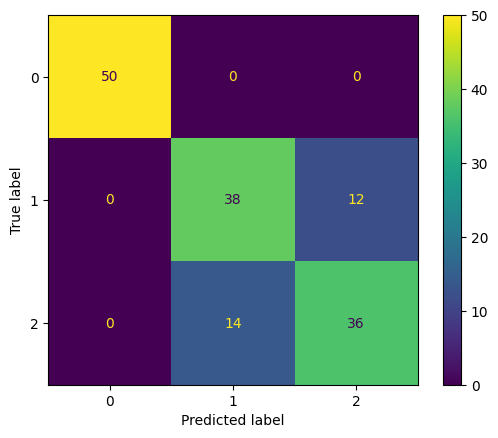

In [7]:
# Normalizamos los datos de 'iris.csv'
iris_norm = np.array(iris.datos)
means_and_desvs = calcularMediasDesv(iris_norm[:,:-1], iris.nominalAtributos)
normalizarDatos(iris_norm[:,:-1], means_and_desvs, iris.nominalAtributos)

print("Matriz de confusion de 'iris.csv' normalizado con k = 3\n")

# Los datos normalizados se han guardado en iris.datos
k_means = kMeans.kMeans(3)
predictions = k_means.clasifica(iris_norm)
getConfusionMatrix(iris_norm[:,-1], predictions)

Como decíamos, la eficacia se ha resentido tras la normalización de los datos. Posiblemente ahora necesitemos un valor de 'k' mayor para poder recuperar la eficacia.

### SKLearn

In [8]:
results_sk = {
    'diab_norm': [],
    'diab_no_norm': [],
    'wdbc_norm': [],
    'wdbc_no_norm': []}

for k in Ks_knn:
    print('k = ' + str(k))
    knn_norm = ClasificadorKNN_SK(KNeighborsClassifier(k))
    knn_no_norm = ClasificadorKNN_SK(KNeighborsClassifier(k), normalize=False)
    
    print('\tCalculando diabetes normalizado...')
    diab_norm_errorVS = knn_norm.validacion(estrategiaVS, diabetes, knn_norm)
    
    print('\tCalculando diabetes no normalizado...')
    diab_noNorm_errorVS = knn_no_norm.validacion(estrategiaVS, diabetes, knn_no_norm)
    
    print('\tCalculando wdbc normalizado...')
    wdbc_norm_errorVS = knn_norm.validacion(estrategiaVS, wdbc, knn_norm)
    
    print('\tCalculando wdbc no normalizado...')
    wdbc_noNorm_errorVS = knn_no_norm.validacion(estrategiaVS, wdbc, knn_no_norm)

    results_sk['diab_norm'].append(np.mean(diab_norm_errorVS))
    results_sk['diab_no_norm'].append(np.mean(diab_noNorm_errorVS))
    results_sk['wdbc_norm'].append(np.mean(wdbc_norm_errorVS))
    results_sk['wdbc_no_norm'].append(np.mean(wdbc_noNorm_errorVS))

print('Cálculos finalizados')

k = 1
	Calculando diabetes normalizado...
	Calculando diabetes no normalizado...
	Calculando wdbc normalizado...
	Calculando wdbc no normalizado...
k = 3
	Calculando diabetes normalizado...
	Calculando diabetes no normalizado...
	Calculando wdbc normalizado...
	Calculando wdbc no normalizado...
k = 5
	Calculando diabetes normalizado...
	Calculando diabetes no normalizado...
	Calculando wdbc normalizado...
	Calculando wdbc no normalizado...
k = 11
	Calculando diabetes normalizado...
	Calculando diabetes no normalizado...
	Calculando wdbc normalizado...
	Calculando wdbc no normalizado...
k = 21
	Calculando diabetes normalizado...
	Calculando diabetes no normalizado...
	Calculando wdbc normalizado...
	Calculando wdbc no normalizado...
Cálculos finalizados


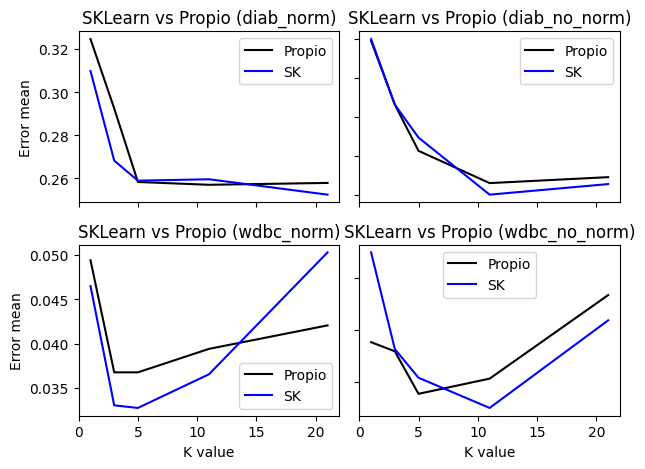

In [13]:
fig, graphs = plt.subplots(2,2)

i, j = 0, 0
for key in results.keys():
    graphs[i,j].plot(Ks_knn, results[key], 'k', label="Propio")
    graphs[i,j].plot(Ks_knn, results_sk[key], 'b', label="SK")
    graphs[i,j].legend()
    graphs[i,j].set_title("SKLearn vs Propio (%s)" % key)
    
    i += (j+1) // 2
    j = (j+1) % 2
    
for graph in graphs.flat:
    graph.set(xlabel="K value", ylabel="Error mean")
    graph.label_outer()

fig.tight_layout()
plt.show()

Matriz de confusion de 'iris.csv' para k = 3



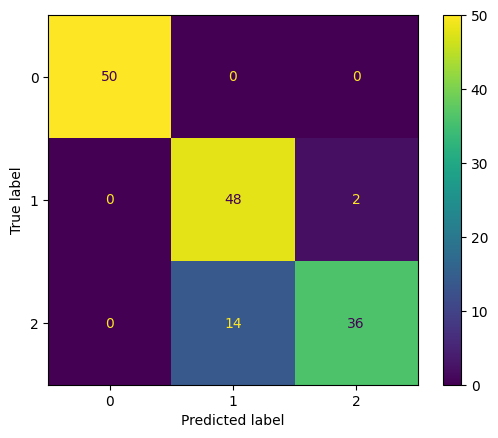

In [10]:
print("Matriz de confusion de 'iris.csv' para k = 3\n")
iris = Datos.Datos(dataPath + 'iris.csv')
k_means_sk = KMeans(3).fit(iris.datos[:,:-1])

clusters = []
for i in range(3):
    clusters.append(np.where(k_means_sk.labels_ == i)[0])

predictions = checkClusters(iris.datos, clusters)
getConfusionMatrix(iris.datos[:,-1], predictions)

En comparacion, las gráficas de nuestro clasificador de kNN se ajustan perfectamente a las de SKLearn. Las pequeñas diferencias que existen entre las gráficas son debidas a la aleatoriedad de los conjuntos de entrenamiento y test que se generan.

En el caso de las matrices de confusión para el algoritmo de kMeans pasa lo mismo, son prácticamente idénticas.